In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy

#한글깨짐방지
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_excel('SDI리포트 Topic정리.xlsx',sheet_name =0)

In [22]:
cols = df.columns[3:].values

df = df.fillna("")

def count_topic(x):
    if x == "":
        x = 0
    else :
        x = len(x.split(','))
    return x
        

for col in cols:
    df[col] = df[col].apply(lambda x: count_topic(x))

### 조정

In [54]:
#컬럼조정 
df['복지'] = df['건강/복지']+ df['복지/문화'] +df['사회/복지']
del df['건강/복지'], df['복지/문화'],df['사회/복지']

df.drop(['뉴스인사이드','부록','특집','해외출장리포트','헤드라인뉴스','벤치마킹사례','토막기사'],axis = 1, inplace= True)

df['도시경영'] = df['도시계획/건설/주택'] + df['도시계획/주택']+ df['도시경영/경제']
df['문화'] = df['문화/관광'] + df['문화/디자인']

del df['도시계획/주택'], df['도시계획/건설/주택'], df['문화/관광'],df['문화/디자인'],df['도시경영/경제']

In [89]:
#날짜조정
df['year'] = df.date.apply(lambda x : x[:4])

In [125]:
m_df = pd.melt(df.iloc[:,3:],id_vars='year')
gm_df = m_df.groupby(['year','variable'])['value'].sum().reset_index()
gm_df = gm_df.rename(columns = {'year':'연도','variable':'카테고리','value':'횟수'})

In [145]:
pivot_df = gm_df.pivot_table(index= '연도',columns ='카테고리',values = '횟수')

In [148]:
old_category = ['도시경영','도시관리','도시교통','도시환경','복지','행재정/교육']
new_category = ['디지털도시','문화','방재/안전','산업/경제','정보/기타','환경/안전']

In [153]:
old_df = gm_df[gm_df['카테고리'].isin(old_category)]
new_df = gm_df[gm_df['카테고리'].isin(new_category)]

In [162]:
pivot_df.to_csv('카테고리별 카운트결과.csv',encoding= 'cp949')

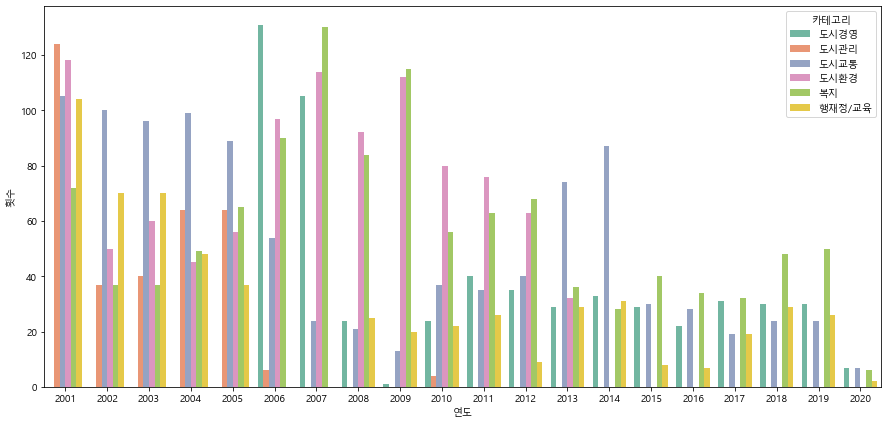

In [156]:
plt.figure(figsize= (15,7))
current_palette = sns.color_palette("Set2", old_df['카테고리'].nunique())
sns.barplot(x = '연도',y = '횟수',hue = '카테고리',data = old_df,
           palette = current_palette)

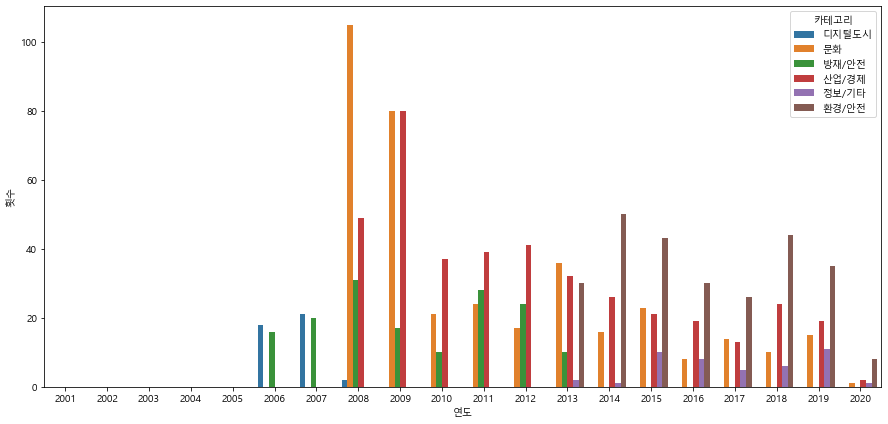

In [157]:
plt.figure(figsize= (15,7))
sns.barplot(x = '연도',y = '횟수',hue = '카테고리',data = new_df)